# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [4]:
df = df.rename(columns=lambda x: x.lower())
df.head()


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [49]:
df = df.set_index(df.linename)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
linename,,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [50]:
df = df.reset_index(drop = True)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [5]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df = df.sort_values('Num_Lines', ascending = False)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
132292,R151,R033,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


## Write a function to clean a column name.

In [6]:
def clean(col_name):
    cleaned = col_name.strip()
    return cleaned

In [7]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [8]:
#Checking the output, we can see the results.
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

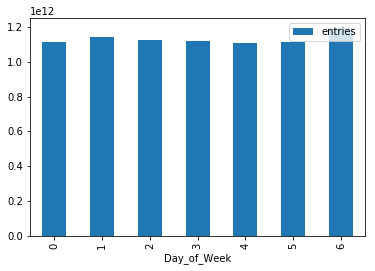

In [12]:
#df.date = pd.to_datetime(df.date)
#df['Day_of_Week'] = df.date.dt.dayofweek
traffic_by_day = df[['Day_of_Week', 'entries']].groupby('Day_of_Week').sum()
traffic_by_day.plot(kind = 'bar')
#traffic_by_day.head()


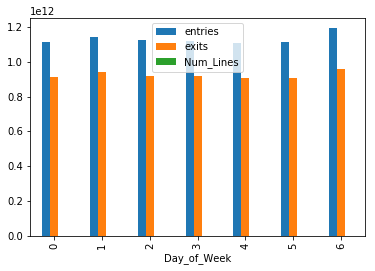

In [10]:
grouped = df.groupby('Day_of_Week').sum()
grouped.plot(kind='bar')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [14]:
grouped = grouped.reset_index()
grouped.head(7)

,level_0,index,Day_of_Week,entries,exits,Num_Lines
0,0,0,0,1114237052454,911938153513,76110
1,1,1,1,1143313287046,942230721477,77303
2,2,2,2,1123655222441,920630864687,75713
3,3,3,3,1122723988662,920691927110,76607
4,4,4,4,1110224700078,906799065337,75573
5,5,5,5,1115661545514,909142081474,74725
6,6,6,6,1192306179082,959223750461,75306


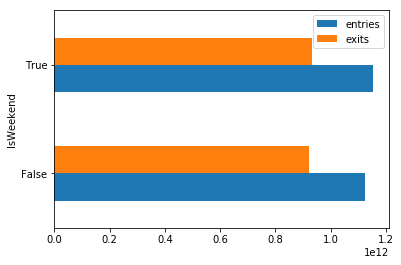

In [16]:
grouped['IsWeekend']= grouped.Day_of_Week.map({0:False, 1:False, 2:False,3:False,4:False,5:True,6:True})
weekend = grouped.groupby('IsWeekend').mean()
weekend[['entries','exits']].plot(kind='barh')

# Drop a couple of columns

In [98]:
df = df.drop('c/a', axis=1) 

In [99]:
df = df.drop('Num_Lines', axis=1) 
df.head()

,unit,scp,station,linename,division,date,time,desc,entries,exits,Day_of_Week,traffic
132292,R033,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,Thursday,4684968
2686,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,Wednesday,6147557
2673,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-08-27,16:00:00,REGULAR,2830710,3305818,Monday,6136528
2674,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-08-27,20:00:00,REGULAR,2832048,3306310,Monday,6138358
2675,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-08-28,00:00:00,REGULAR,2832325,3306433,Tuesday,6138758
